# WORK-IN-PROGRESS

Analysis is based on nifty50 index for the period from **19 Oct 2015 to 13 Oct 2017** taken from [here](https://www.nseindia.com/products/content/equities/indices/historical_index_data.htm)

In [98]:
# Import necesary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar

In [99]:
# Load in the data

data = pd.read_csv('./data/from-19-10-2015.csv', index_col=0, parse_dates=True)
data = data.append(pd.read_csv('data/from-14-10-2016.csv', index_col=0, parse_dates=True))
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2015-10-19,8262.55,8283.05,8239.20,8275.05,128300205,6880.43
2015-10-20,8280.30,8294.05,8229.20,8261.65,159947752,7661.53
2015-10-21,8258.35,8294.40,8217.15,8251.70,149270047,6689.35
2015-10-23,8308.25,8328.10,8280.75,8295.45,156664310,7466.28
2015-10-26,8333.65,8336.30,8252.05,8260.55,138006303,6799.49


In [100]:
# Create a new column with the day of the week
data['dayofweek'] = data.index.weekday_name
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek
Date,,,,,,,
2015-10-19,8262.55,8283.05,8239.20,8275.05,128300205,6880.43,Monday
2015-10-20,8280.30,8294.05,8229.20,8261.65,159947752,7661.53,Tuesday
2015-10-21,8258.35,8294.40,8217.15,8251.70,149270047,6689.35,Wednesday
2015-10-23,8308.25,8328.10,8280.75,8295.45,156664310,7466.28,Friday
2015-10-26,8333.65,8336.30,8252.05,8260.55,138006303,6799.49,Monday


In [101]:
#Remove the entries for 2015 Nov 11 and 2016 Oct 30. They are muhurat trading days.
data = data[(data.index != '2015-11-11') & (data.index != '2016-10-30')]

In [104]:
#Add a column to record Returns
data['Range'] = data['High'] - data['Low']
data['PrevClose'] = data['Close'].shift(1)
data['Return'] = ((data['Close'] - data['PrevClose']) / data['PrevClose']) * 100
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek,Range,PrevClose,Return
index,,,,,,,,,,
0,8262.55,8283.05,8239.20,8275.05,128300205,6880.43,Monday,43.85,NaN,NaN
1,8280.30,8294.05,8229.20,8261.65,159947752,7661.53,Tuesday,64.85,8275.05,-0.161933
2,8258.35,8294.40,8217.15,8251.70,149270047,6689.35,Wednesday,77.25,8261.65,-0.120436
3,8308.25,8328.10,8280.75,8295.45,156664310,7466.28,Friday,47.35,8251.70,0.530194
4,8333.65,8336.30,8252.05,8260.55,138006303,6799.49,Monday,84.25,8295.45,-0.420713


In [105]:
data['index'] = [x for x in range(data.shape[0])]
data.set_index('index', inplace=True)
data.drop(0, inplace=True)
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek,Range,PrevClose,Return
index,,,,,,,,,,
1,8280.30,8294.05,8229.20,8261.65,159947752,7661.53,Tuesday,64.85,8275.05,-0.161933
2,8258.35,8294.40,8217.15,8251.70,149270047,6689.35,Wednesday,77.25,8261.65,-0.120436
3,8308.25,8328.10,8280.75,8295.45,156664310,7466.28,Friday,47.35,8251.70,0.530194
4,8333.65,8336.30,8252.05,8260.55,138006303,6799.49,Monday,84.25,8295.45,-0.420713
5,8230.35,8241.95,8217.05,8232.90,161493491,8271.49,Tuesday,24.90,8260.55,-0.334723


In [106]:
returns = dict()
for day in calendar.day_name[:-2]:
    returns[day] = (data[data.dayofweek == day].Return.values)

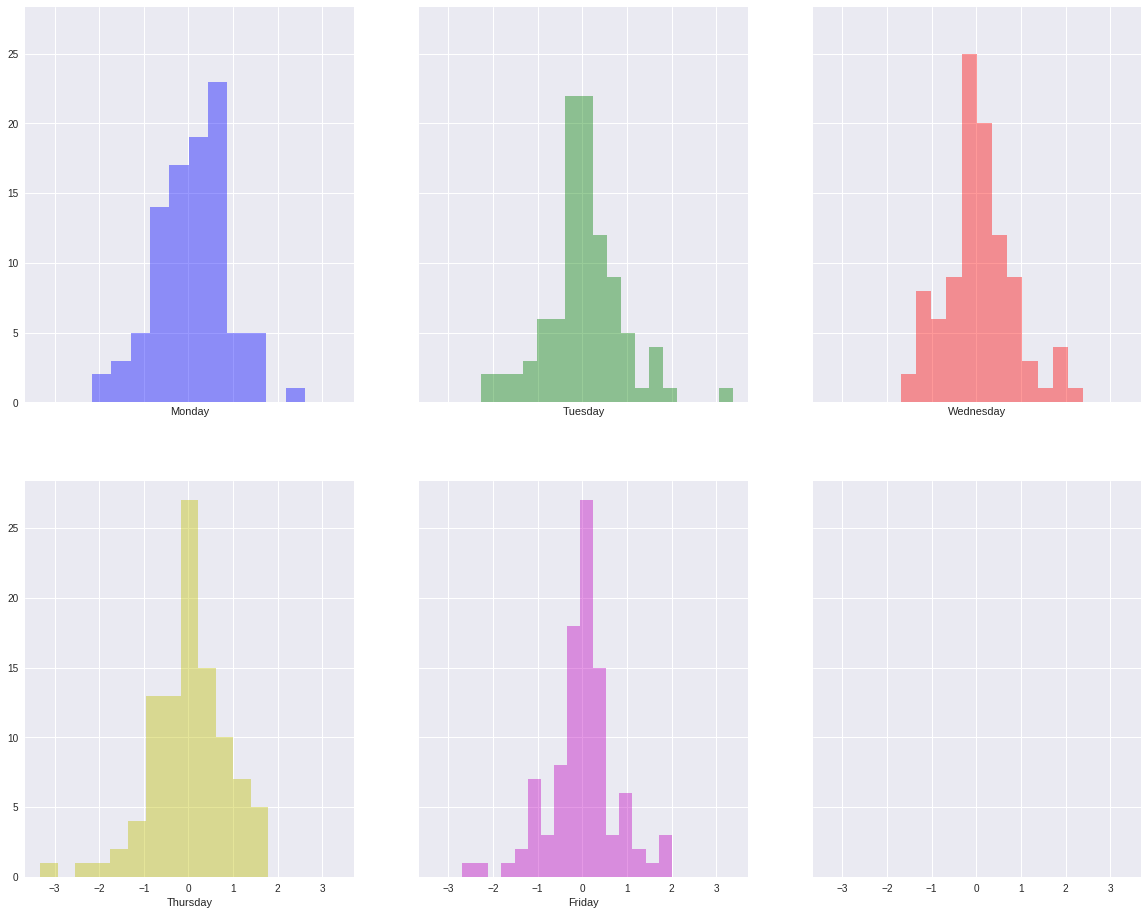

In [134]:
# Plot histograms
i = 0
fig, ax = plt.subplots(nrows=2, ncols=3, sharex='all', sharey='all', figsize=(20, 16))
ax = ax.flatten()
colors = ['b', 'g', 'r', 'y', 'm']
while i < 5:
    day = calendar.day_name[i]
    sns.distplot(returns[day], axlabel=day, ax=ax[i], kde=False, color=colors[i])
    i = i + 1
